## LAB Time Series | Py-5-3

### **Fujo Vehicular 2020-2021 en Buenos Aires, Argentina**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data2020 = pd.read_csv('Data/flujo-vehicular-2020.csv', sep =',')
data2021 = pd.read_csv('Data/flujo-vehicular-2021.csv', sep =',')

In [4]:
data2020.info()
data2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [5]:
data2021.info()
data2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029367 entries, 0 to 3029366
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  object
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  object
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Observacion             object
 7   Sentido                 object
 8   Tipo Cobro              object
 9   Pasos                   object
dtypes: object(10)
memory usage: 231.1+ MB


,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19


### Metadata 

**periodo**: año del dset 

**fecha**: año día mes

**hora_inicio** hora de inicio de la cuenta de vehiculos

**hora_fin** hora de fin de la cuenta de vehiculos 

**dia**: día de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años 

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Obs: en el 2021 no dice hora inicio ni hora fin y no hay info en internet --> Asumo hora inicio

### Procedimiento:
Primero vamos a realizar ciertas limpiezas y transformaciones. Luego vamos a concatenar ambos DataFrames
para así poder hacer el análisis temporal del flujo vehicular y finalmente vamos a realizar proyecciones a futuro.

Viendo el DataFrame del 2020 se puede observar que hay varios ".0" en el final de cada celda. Se los elimina (antes estaban
en float)

In [6]:
data2020['dia_fecha'] = data2020['dia_fecha'].astype(int)
data2020['hora_inicio'] = data2020['hora_inicio'].astype(int)
data2020['periodo'] = data2020['periodo'].astype(int) 
data2020['cantidad_pasos'] = data2020['cantidad_pasos'].astype(int)

In [7]:
data2020.dtypes

periodo             int32
fecha              object
mes                object
dia                object
dia_fecha           int32
hora_inicio         int32
hora_fin          float64
estacion           object
tipo_vehiculo      object
forma_pago         object
observacion        object
sentido            object
cantidad_pasos      int32
dtype: object

In [8]:
data2020.sample()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
792757,2020,2020-04-25,abril,Sábado,25,8,9.0,AVELLANEDA,Auto,Tag,Tag - PrePago OCR,Provincia,2


Vamos a acomodar el formato de la columna 'fecha' para poder usarla en el análisis temporal

In [9]:
data2020['fecha'] = data2020['periodo'].astype(str) + '-' + data2020['mes'] + '-' + data2020['dia_fecha'].astype(str) + ' ' + data2020['hora_inicio'].astype(str) + ':00:00'

data2020.drop(columns=['periodo', 'mes', 'dia_fecha', 'hora_inicio'], inplace=True)
data2020

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020-enero-1 0:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020-enero-1 0:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020-enero-1 0:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020-enero-1 0:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020-enero-1 0:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1
...,...,...,...,...,...,...,...,...,...
2533738,2020-diciembre-31 21:00:00,Jueves,22.0,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,1
2533739,2020-diciembre-31 21:00:00,Jueves,22.0,DELLEPIANE LINIERS,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,1
2533740,2020-diciembre-31 21:00:00,Jueves,22.0,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,1
2533741,2020-diciembre-31 22:00:00,Jueves,23.0,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2


In [10]:
data2020.dtypes

fecha              object
dia                object
hora_fin          float64
estacion           object
tipo_vehiculo      object
forma_pago         object
observacion        object
sentido            object
cantidad_pasos      int32
dtype: object

Se necesitan más ajustes. Utilizo una función de Internet

In [11]:
month_map = {
    'enero': '01',
    'febrero': '02',
    'marzo': '03',
    'abril': '04',
    'mayo': '05',
    'junio': '06',
    'julio': '07',
    'agosto': '08',
    'septiembre': '09',
    'octubre': '10',
    'noviembre': '11',
    'diciembre': '12'
}

def convert_date(date_str):
    parts = date_str.split()
    date_part = parts[0]
    time_part = parts[1]
    
    year, month_name, day = date_part.split('-')
    month = month_map[month_name.lower()]
    
    return f"{year}-{month}-{day} {time_part}"

data2020['fecha'] = data2020['fecha'].apply(convert_date)
data2020['fecha'] = pd.to_datetime(data2020['fecha'])
data2020

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1
...,...,...,...,...,...,...,...,...,...
2533738,2020-12-31 21:00:00,Jueves,22.0,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,1
2533739,2020-12-31 21:00:00,Jueves,22.0,DELLEPIANE LINIERS,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,1
2533740,2020-12-31 21:00:00,Jueves,22.0,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,1
2533741,2020-12-31 22:00:00,Jueves,23.0,ILP,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2


In [12]:
data2020.sample()
#La columna 'fecha' quedó en el formato deseado

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
624426,2020-03-18 10:00:00,Miércoles,11.0,ILP,Pesados 4 Ejes,Violación,Violación - Normal,Provincia,3


En el data2021 no hay columna de fecha, por lo que la vamos a crear

In [13]:
data2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
643971,2021,Pesados 5 Ejes,14,4,ILP,mayo,Tag - PosPago,Provincia,Tag,14


In [14]:
data2021.dtypes

Año de Fecha Operativa    object
Cat Cobrada               object
Día de Fecha Operativa    object
Hora HH                   object
ID Peaje                  object
Mes de Fecha Operativa    object
Observacion               object
Sentido                   object
Tipo Cobro                object
Pasos                     object
dtype: object

In [15]:
data2021['Mes de Fecha Operativa'].unique()

array(['abril', 'Total', 'marzo', 'mayo', 'febrero', 'enero', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
       'diciembre'], dtype=object)

Hay un valor en el array de mes que dice 'Total'. Lo vamos a eliminar

In [16]:
data2021 = data2021[data2021['Mes de Fecha Operativa'] != 'Total']

In [17]:
data2021.head()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19


In [18]:
data2020.sample()

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
708813,2020-04-07 19:00:00,Martes,20.0,PB2,Pesados 3 Ejes,Tag,Tag - PosPago,Centro,1


Vamos a eliminar ciertas columnas que no son necesarias del data2020. Para el time series analysis solo nos interesrían las 
columnas de fecha y cantidad de pasos, sin embargo, por ahora vamos a mantener la de estación y forma de pago porque las necesitamos para 
hacer un filtro: estación - Illia y  forma de pago - Efectivo

In [19]:
data2020.drop(columns=['hora_fin','tipo_vehiculo','observacion','sentido','dia'], inplace=True)

In [20]:
data2020.sample()

,fecha,estacion,forma_pago,cantidad_pasos
129548,2020-01-17 15:00:00,AVELLANEDA,Exento,5


In [21]:
data2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
1698819,2021,Pesados 2 Ejes,8,18,DEC,agosto,Efectivo,Centro,Efectivo,3


En el de 2021 también pondremos Efectivo y estación Illia ('ID Peaje' y 'Tipo Cobro')

In [22]:
data2021['ID Peaje'].unique()

array(['ALB', 'AVE', 'DEC', 'DEL', 'ILL', 'ILP', 'PB1', 'PB2', 'PB3',
       'PB4', 'RET', 'SAL', 'SAR'], dtype=object)

Creamos la columna 'fecha'

In [23]:
spanish_to_english_months = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}


data2021['Month'] = data2021['Mes de Fecha Operativa'].map(spanish_to_english_months)

data2021['fecha'] = pd.to_datetime(data2021['Año de Fecha Operativa'].astype(str) + '-' +
                                   data2021['Month'] + '-' +
                                   data2021['Día de Fecha Operativa'].astype(str) +
                                   ' ' + data2021['Hora HH'].astype(str).str.zfill(2) + ':00:00')

data2021.drop(columns=['Month'], inplace=True)

In [24]:
data2021.sample()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos,fecha
1152609,2021,Auto,17,5,PB1,junio,Tag - PosPago OCR,Provincia,Tag,3,2021-06-17 05:00:00


Después de haber creado la columna 'fecha', nos vamos a cargar ciertas columnas para que queden las mismas que en el data2020

In [25]:
data2021.drop(columns=['Año de Fecha Operativa', 'Cat Cobrada', 'Día de Fecha Operativa', 'Mes de Fecha Operativa', 'Hora HH', 'Observacion','Sentido'], inplace=True)

In [26]:
data2021.sample()

,ID Peaje,Tipo Cobro,Pasos,fecha
2467534,ILP,Tag,4,2021-10-30 10:00:00


In [27]:
data2021['ID Peaje'].unique()

array(['ALB', 'AVE', 'DEC', 'DEL', 'ILL', 'ILP', 'PB1', 'PB2', 'PB3',
       'PB4', 'RET', 'SAL', 'SAR'], dtype=object)

In [28]:
data2021['Tipo Cobro'].unique()

array(['Efectivo', 'Mercado Pago', 'Rec.Deuda', 'Tag', 'Exento',
       'Tarjeta Magnética', 'Violación', 'CPP'], dtype=object)

In [29]:
data2021.rename(columns={'ID Peaje':'estacion','Tipo Cobro':'forma_pago'}, inplace=True)
data2021.sample()

,estacion,forma_pago,Pasos,fecha
689667,DEL,Efectivo,308,2021-02-08 11:00:00


In [30]:
print(data2020.columns)
print(data2021.columns)

Index(['fecha', 'estacion', 'forma_pago', 'cantidad_pasos'], dtype='object')
Index(['estacion', 'forma_pago', 'Pasos', 'fecha'], dtype='object')


In [31]:
data2021.rename(columns={'Pasos':'cantidad_pasos'}, inplace=True)
data2021.sample()

,estacion,forma_pago,cantidad_pasos,fecha
879379,AVE,Tag,2,2021-02-22 08:00:00


In [32]:
data2020.sample()

,fecha,estacion,forma_pago,cantidad_pasos
2199176,2020-11-13 04:00:00,ILP,Violación,1


Ya nos quedaron ambos DataFrames con las mismas columnas. Queda aplicar los filtros en 'estacion' y 'forma_pago' para poder concatenarlos.

In [34]:
mask=np.logical_and(data2021.estacion=='ILL', data2021.forma_pago == 'Efectivo')
data2021 =data2021[mask]
data2021.shape

(53858, 4)

In [35]:
data2020.estacion.unique()

array(['ALBERDI', 'AVELLANEDA', 'DELLEPIANE LINIERSLEPIANE CENTRO',
       'DELLEPIANE LINIERS', 'ILLIA', 'ILP', 'PB1', 'PB3', 'PB4',
       'RETIRO', 'SALGUERO', 'SARMIENTO', 'PB2'], dtype=object)

In [36]:
data2020.forma_pago.unique()

array(['Efectivo', 'Rec.Deuda', 'Tarjeta Magnética', 'Tag', 'Exento',
       'Violación', 'CPP', 'Mercado Pago'], dtype=object)

In [37]:
mask=np.logical_and(data2020.estacion=='ILLIA', data2020.forma_pago == 'Efectivo')
data2020=data2020[mask]

In [38]:
data2021.sample()

,estacion,forma_pago,cantidad_pasos,fecha
1933316,ILL,Efectivo,9,2021-09-08 10:00:00


In [39]:
data2020.sample()

,fecha,estacion,forma_pago,cantidad_pasos
323007,2020-02-10 18:00:00,ILLIA,Efectivo,1


Finalmente podemos concatenar! :D

In [41]:
data=pd.concat([data2020, data2021])
data.reset_index(drop=True, inplace=True)

In [42]:
data.head()

,fecha,estacion,forma_pago,cantidad_pasos
0,2020-01-01 00:00:00,ILLIA,Efectivo,326
1,2020-01-01 00:00:00,ILLIA,Efectivo,319
2,2020-01-01 01:00:00,ILLIA,Efectivo,199
3,2020-01-01 01:00:00,ILLIA,Efectivo,180
4,2020-01-01 02:00:00,ILLIA,Efectivo,114


In [43]:
data.shape

(106232, 4)

In [44]:
52374+53858

106232

Veamos si hay Nulos y/o Duplicados

In [45]:
data.isna().sum()
#No hay

fecha             0
estacion          0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [46]:
data[data.duplicated()]

,fecha,estacion,forma_pago,cantidad_pasos
53,2020-01-01 13:00:00,ILLIA,Efectivo,1
57,2020-01-01 19:00:00,ILLIA,Efectivo,1
71,2020-01-01 06:00:00,ILLIA,Efectivo,12
85,2020-01-01 13:00:00,ILLIA,Efectivo,12
112,2020-01-01 18:00:00,ILLIA,Efectivo,1
...,...,...,...,...
106226,2021-12-24 08:00:00,ILL,Efectivo,1
106227,2021-12-27 11:00:00,ILL,Efectivo,1
106228,2021-12-27 20:00:00,ILL,Efectivo,2
106229,2021-12-28 17:00:00,ILL,Efectivo,1


In [47]:
data.drop_duplicates(inplace=True) #Eliminando duplicados

Reordenemos el dataset por fecha

In [49]:
data.sort_values('fecha', inplace = True)
data.reset_index(drop=True, inplace = True)
data

,fecha,estacion,forma_pago,cantidad_pasos
0,2020-01-01 00:00:00,ILLIA,Efectivo,326
1,2020-01-01 00:00:00,ILLIA,Efectivo,319
2,2020-01-01 00:00:00,ILLIA,Efectivo,4
3,2020-01-01 00:00:00,ILLIA,Efectivo,10
4,2020-01-01 00:00:00,ILLIA,Efectivo,1
...,...,...,...,...
88634,2021-12-31 18:00:00,ILL,Efectivo,260
88635,2021-12-31 19:00:00,ILL,Efectivo,264
88636,2021-12-31 19:00:00,ILL,Efectivo,10
88637,2021-12-31 19:00:00,ILL,Efectivo,2


### Análisis Temporal

Grafiquemos los datos tal como están para el período entero

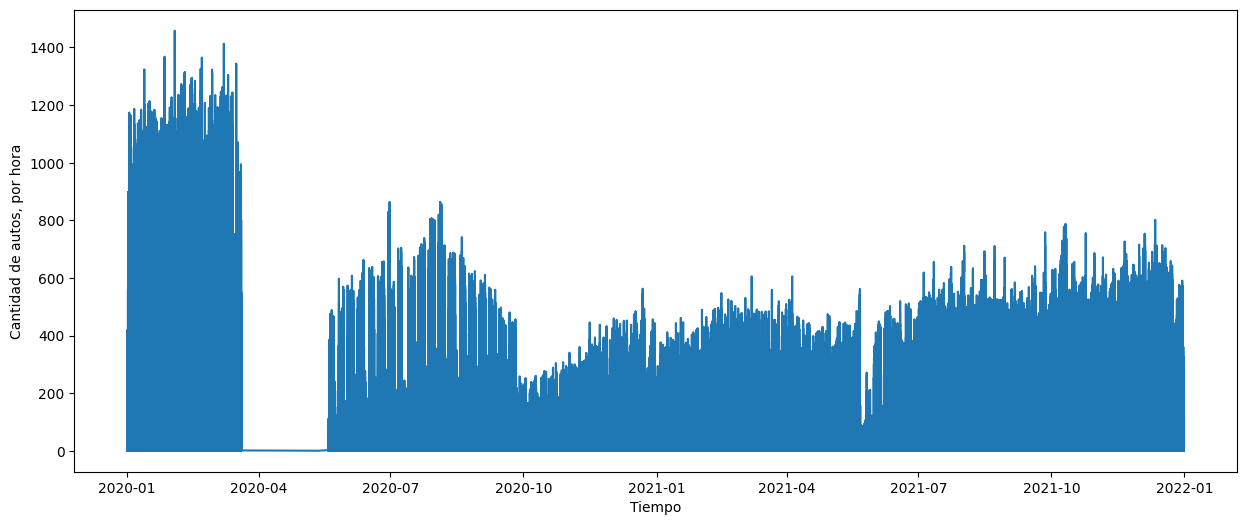

In [50]:
plt.figure(figsize = (15,6))
plt.plot(data.fecha, data.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Es difícil poder hacer interpretaciones detalladas en una gráfica de este estilo (por haber fluctuaciones por hora en un período de 2 años). Pero lo que sí se puede hacer, es tener
una visión macro del flujo vehicular. Se puede ver que entre Marzo y Mayo aprox, no pasaron vehículos en la estación de Illia
(al menos con pago en efectivo). Eso se debe al lockdown por la pandemia  del COVID19. También se puede ver que en Octubre del 20
y Junio del 21 hubieron descensos bastante importantes. Puede que hayan sucedido eventos puntuales. Luego los analizaremos.
También está claro que post pandemia, el paso de los vehículos disminuyó significativamente. 

Pasaremos a hacer análisis en períodos más cortos.

In [51]:
data['cantidad_pasos']=pd.to_numeric(data['cantidad_pasos'])

Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable

In [52]:
diario = data.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head(2)  

(731, 3)


,estacion,forma_pago,cantidad_pasos
fecha,,,
2020-01-01,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,21320
2020-01-02,ILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAILLIAI...,EfectivoEfectivoEfectivoEfectivoEfectivoEfecti...,33650


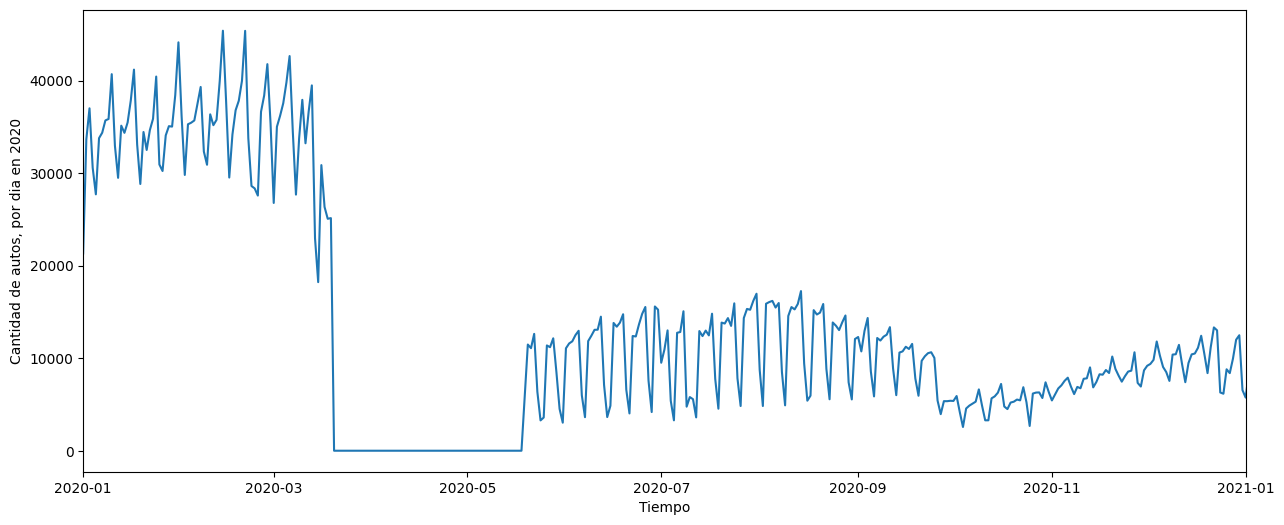

In [53]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2021,1,1))  
plt.xlabel('Tiempo')   
plt.ylabel('Cantidad de autos, por dia en 2020')
plt.show()

La gráfica anterior ya es más fácil de leer pues está más agregada que la primera y está solo para un año. Está claro que el 2020 fue un año especial, por lo que no me animo a sacar conclusiones para ver si hay patrones anuales. Sin embargo, se puede ver que luego de que terminaron las restricciones de tránsito por la pandemia, el paso de los autos sigue siendo menos que en pre pandemia. Eso se debe a que incluso en Mayo, mucha gente pasaba gran parte del día en la casa (para cuidarse, teletrabajo, etc) porque la pandemia no había terminado.

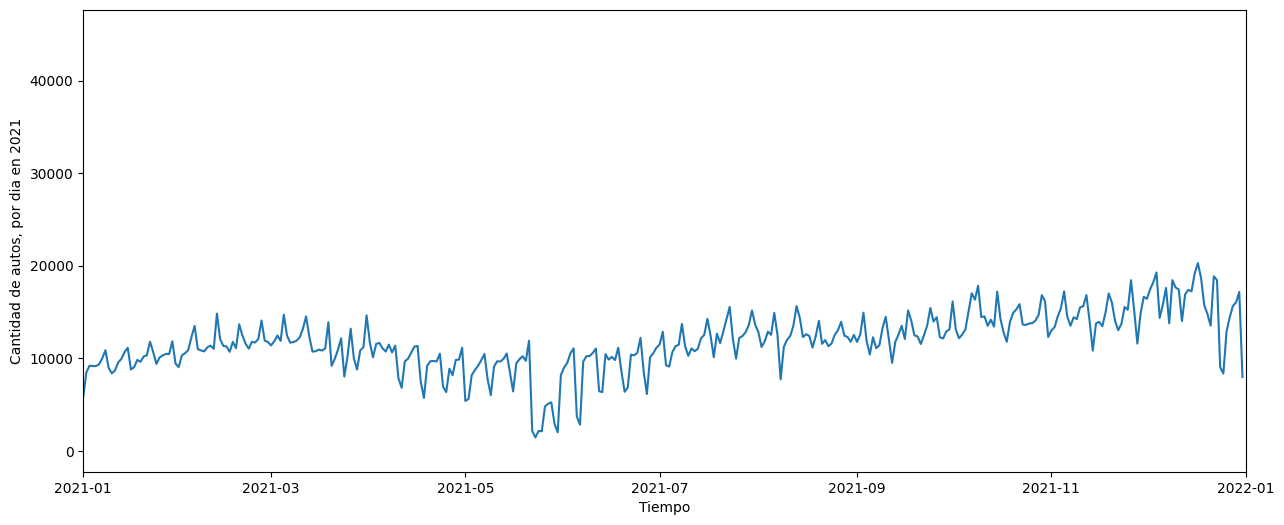

In [54]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2021,1,1), datetime.date(2022,1,1))  
plt.xlabel('Tiempo')   
plt.ylabel('Cantidad de autos, por dia en 2021')
plt.show()

En la gráfica de arriba, se nota que si bien el descenso que antes veíamos alrededor de Junio se puede apreciar un poco, el de Octubre no es apreciable aquí. Puede que se debiera a horas específicas pero que no causaran grandes cambios en la suma de pasos por día. Podría estar interesante ver qué sucedió por hora
en algún día clave de Octubre.
El descenso de Junio se puede apreciar un poco. Pero creo que no tiene una forma especial que haga que se deba a algún evento puntual. Quizás sea un tema estacional.
Por otro lado, la tendencia general es constante. No noto muchos cambios debido a las estaciones del año.

Hagámosle un zoom al período de la restricción vehicular:

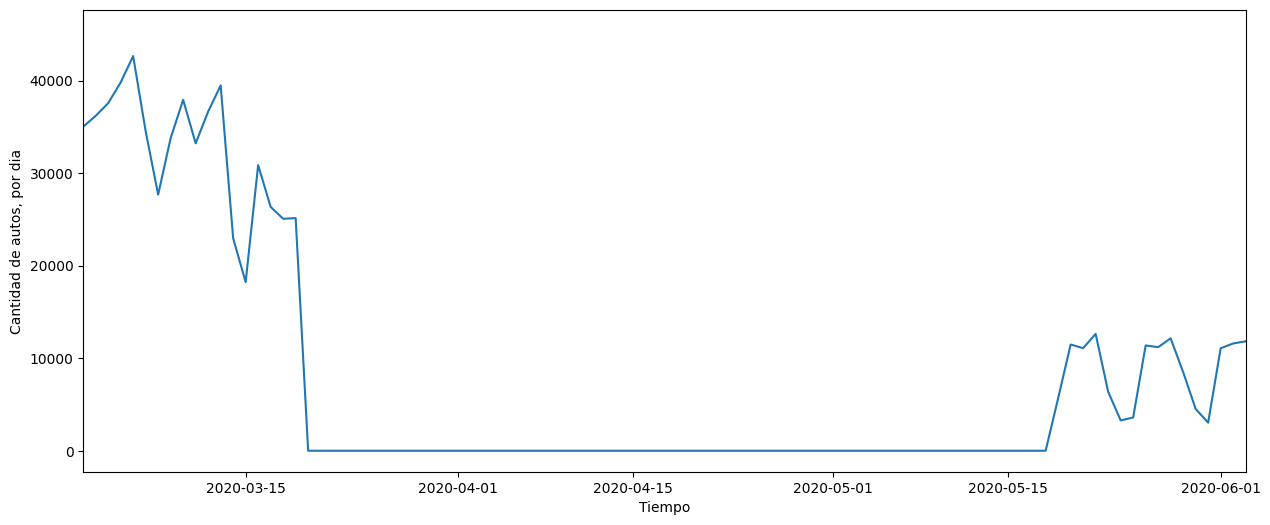

In [55]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,3,2), datetime.date(2020,6,3))  
plt.xlabel('Tiempo')  
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Se puede ver que el flujo fue nulo entre el 20 de Marzo al 20 de Mayo aproximadamente. Es coherente con lo que dice en Internet
así que efectivamente se debe a la pandemia.

Veamos algunas gráficas de flujo por hora para períodos de un día, de forma de poder ver si hay algún patrón.

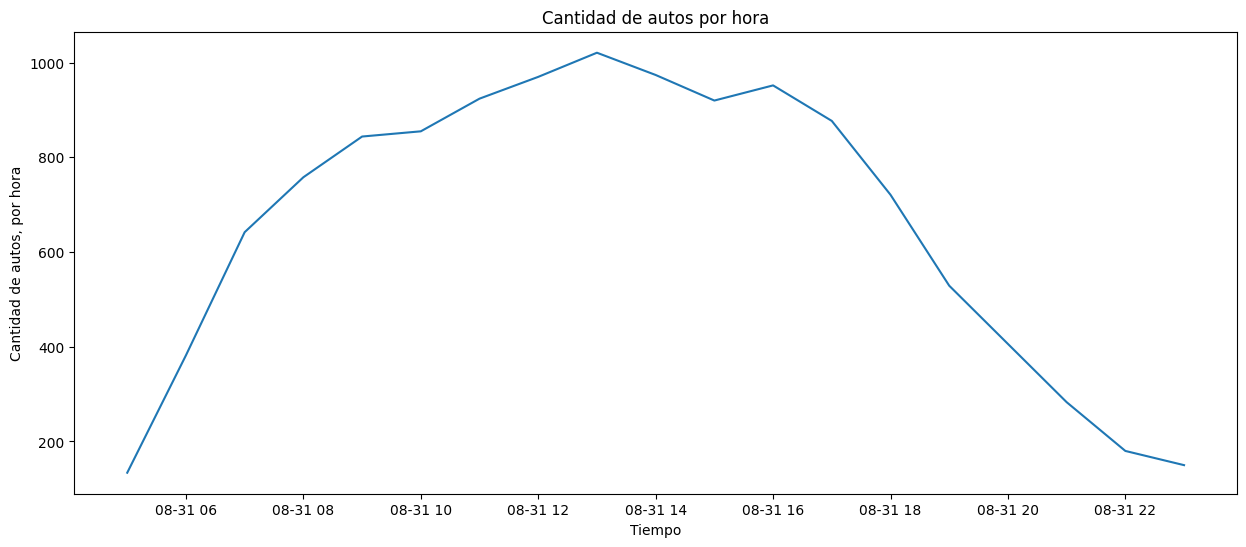

In [56]:
data['fecha'] = pd.to_datetime(data['fecha'])

dia_especifico= data[(data['fecha'] >= '2021-8-31') & (data['fecha'] < '2021-09-01')]
dia_especifico.set_index('fecha', inplace=True)
suma=dia_especifico.resample('H').sum()
suma=suma.reset_index()

plt.figure(figsize=(15, 6))
plt.plot(suma['fecha'], suma['cantidad_pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Cantidad de autos por hora')
plt.show()

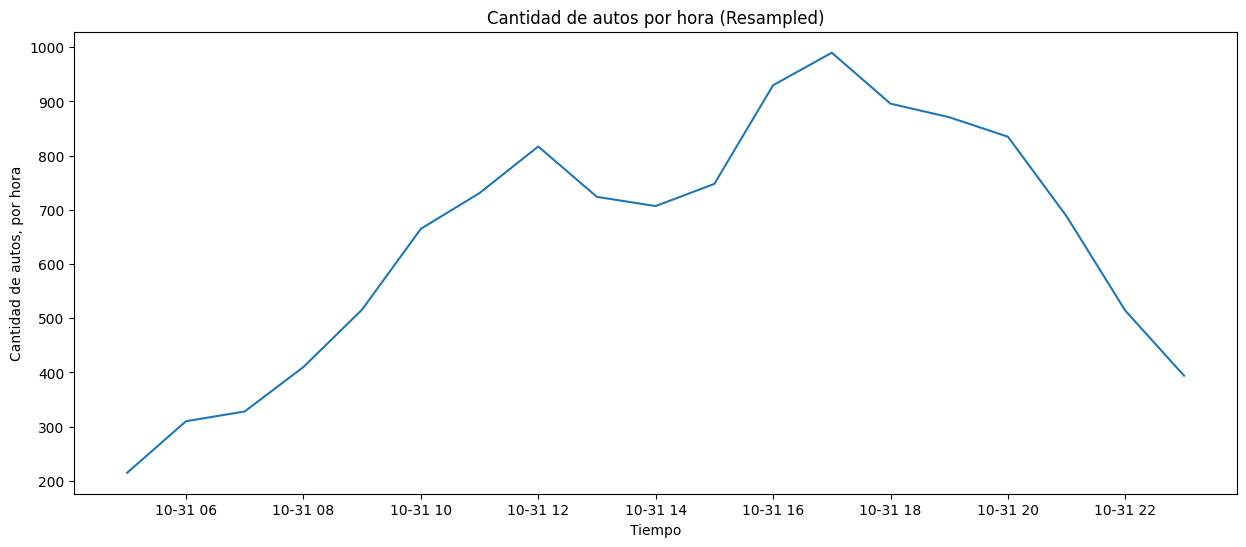

In [57]:
data['fecha'] = pd.to_datetime(data['fecha'])

dia_especifico= data[(data['fecha'] >= '2021-10-31') & (data['fecha'] < '2021-11-01')]
dia_especifico.set_index('fecha', inplace=True)
suma=dia_especifico.resample('H').sum()
suma=suma.reset_index()

plt.figure(figsize=(15, 6))
plt.plot(suma['fecha'], suma['cantidad_pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Cantidad de autos por hora')
plt.show()

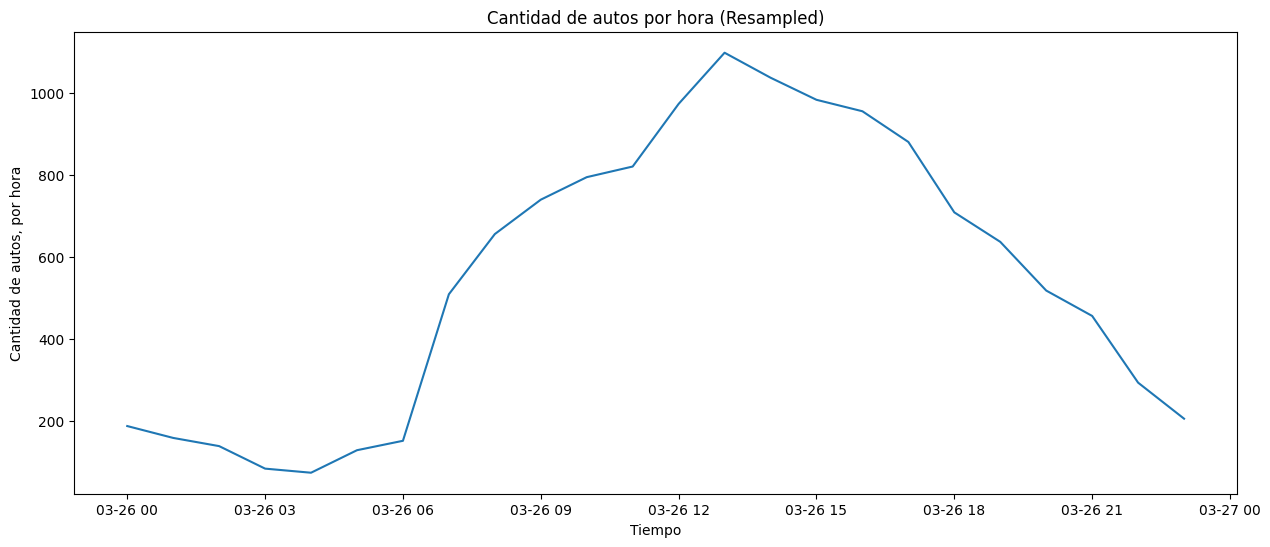

In [58]:
data['fecha'] = pd.to_datetime(data['fecha'])

dia_especifico= data[(data['fecha'] >= '2021-03-26') & (data['fecha'] < '2021-03-27')]
dia_especifico.set_index('fecha', inplace=True)
suma=dia_especifico.resample('H').sum()
suma=suma.reset_index()

plt.figure(figsize=(15, 6))
plt.plot(suma['fecha'], suma['cantidad_pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title('Cantidad de autos por hora')
plt.show()

Creo que hay un patrón claro. El movimiento es mínimo en períodos de la noche en los que la mayoría de gente duerme y es máximo un
poco después del medio día.  

Veamos cómo quedan las gráficas de flujo semanal y diario superpuestas para el 2021

In [59]:
data['fecha'] = pd.to_datetime(data['fecha'])

data.set_index('fecha', inplace=True)
diario = data.resample('D').sum()
semanal = data.resample('W').sum()
diario = diario.reset_index()
semanal = semanal.reset_index()

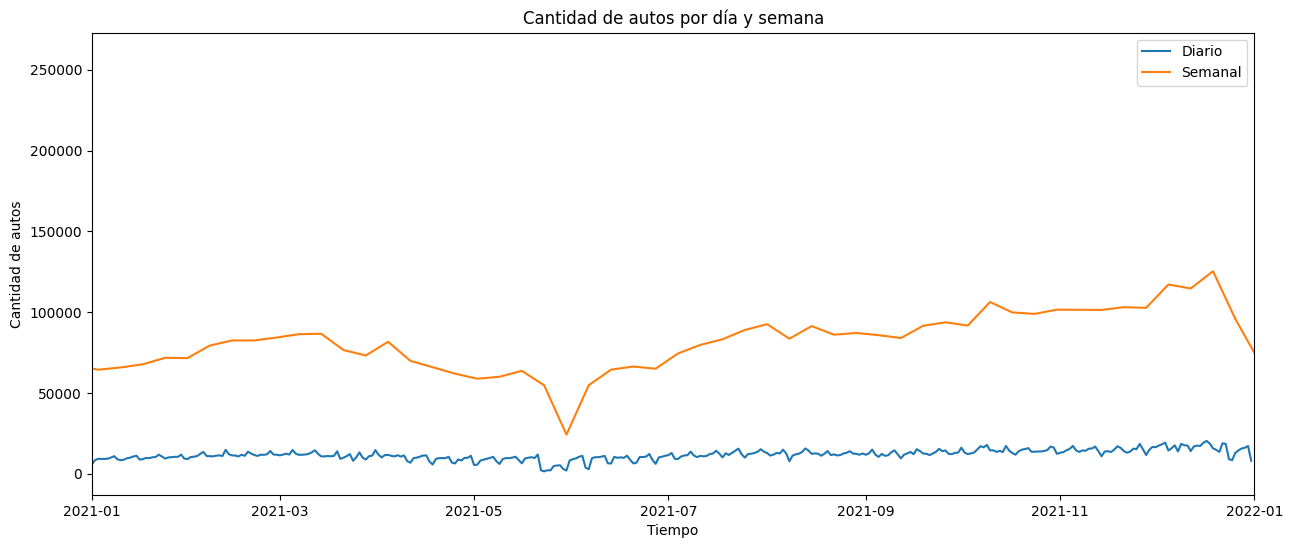

In [60]:
plt.figure(figsize=(15, 6))
plt.plot(diario['fecha'], diario['cantidad_pasos'], label='Diario')
plt.plot(semanal['fecha'], semanal['cantidad_pasos'], label='Semanal')
plt.xlim(datetime.date(2021, 1, 1), datetime.date(2022, 1, 1))
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día y semana')
plt.show()

Creo que si se quisieran hacer estudios anuales, las gráficas semanales darían más claridad que las diarias para poder
detectar tendencias (viendo la gráfica superior).

Gráfico únicamente semanal

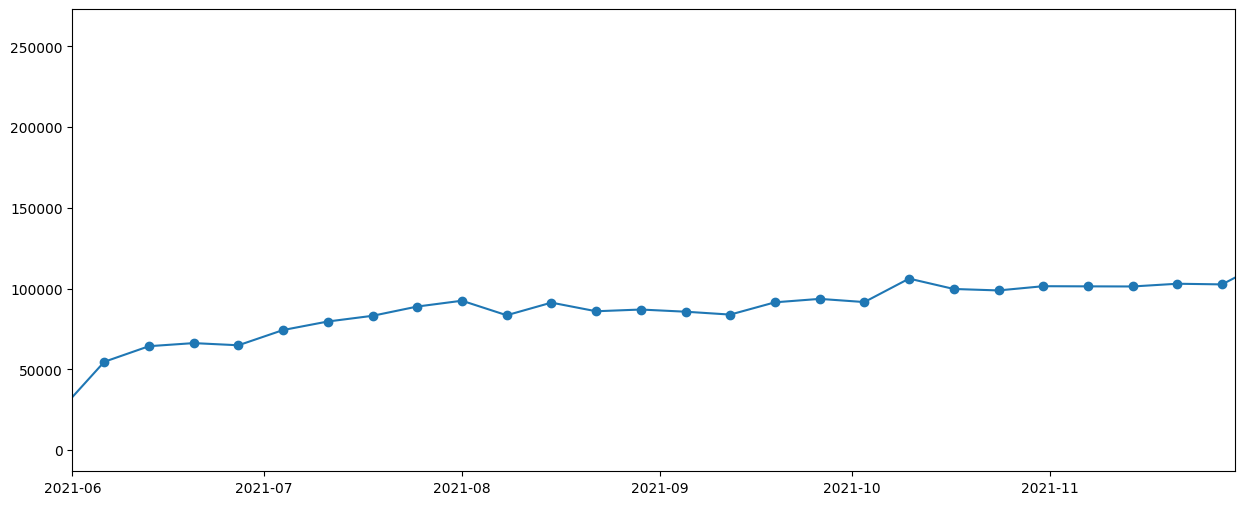

In [61]:
plt.figure(figsize=(15, 6))
plt.plot(semanal['fecha'], semanal['cantidad_pasos'], label='Semanal', marker='o')
plt.xlim(datetime.date(2021, 6, 1), datetime.date(2021, 11, 30))
plt.show()

In [62]:
data.drop(columns=['estacion','forma_pago'], inplace=True)
data.columns

Index(['cantidad_pasos'], dtype='object')

In [63]:
data
#Se necesita resetear al index

,cantidad_pasos
fecha,
2020-01-01 00:00:00,326
2020-01-01 00:00:00,319
2020-01-01 00:00:00,4
2020-01-01 00:00:00,10
2020-01-01 00:00:00,1
...,...
2021-12-31 18:00:00,260
2021-12-31 19:00:00,264
2021-12-31 19:00:00,10


In [64]:
data.reset_index(inplace=True)

In [65]:
data.columns

Index(['fecha', 'cantidad_pasos'], dtype='object')

Veamos 2 gráficas de **Rolling Window**

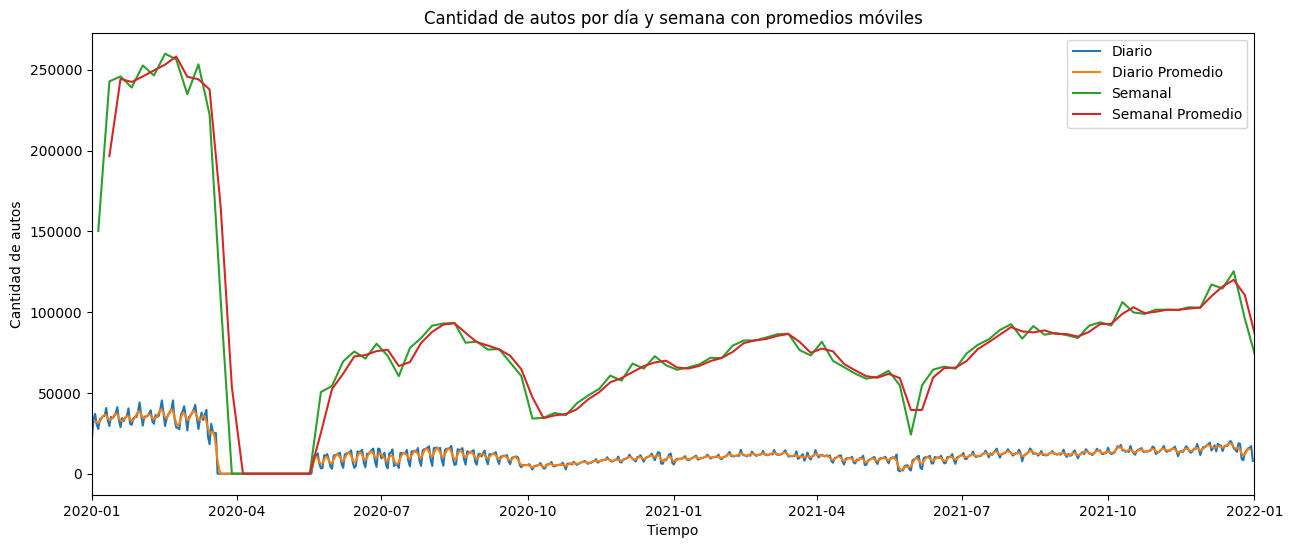

In [66]:
data['fecha'] = pd.to_datetime(data['fecha'])

data.set_index('fecha', inplace=True)

diario = data.resample('D').sum()
semanal = data.resample('W').sum()

diario_promedio = diario.rolling(window=5, win_type='triang', center=True).mean()
semanal_promedio = semanal.rolling(window=2, win_type='triang', center=True).mean()

plt.figure(figsize=(15, 6))
plt.plot(diario.index, diario['cantidad_pasos'], label='Diario')
plt.plot(diario_promedio.index, diario_promedio['cantidad_pasos'], label='Diario Promedio')
plt.plot(semanal.index, semanal['cantidad_pasos'], label='Semanal')
plt.plot(semanal_promedio.index, semanal_promedio['cantidad_pasos'], label='Semanal Promedio')
plt.xlim(datetime.date(2020, 1, 1), datetime.date(2022, 1, 1))
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por día y semana con promedios móviles')
plt.show()

In [67]:
data.reset_index(inplace=True)

In [68]:
diario_promedio = diario.rolling(5, win_type='triang', center=True).mean()
semanal_promedio = semanal.rolling(2, win_type='triang', center=True).mean()

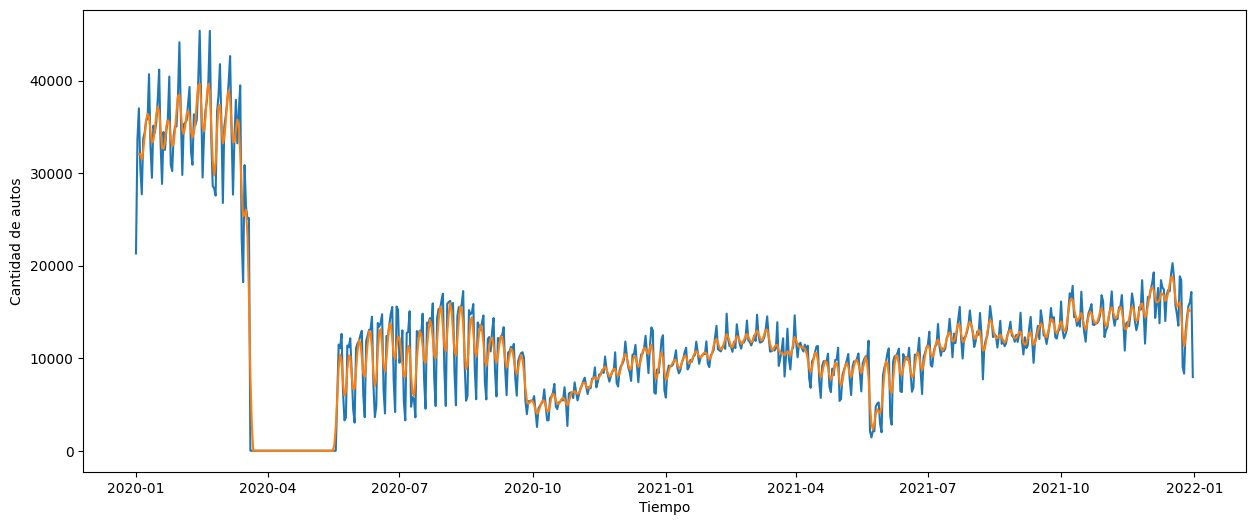

In [69]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Diario')
plt.plot(diario_promedio.index, diario_promedio.cantidad_pasos, label = 'Diario Promedio')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos')
plt.show()

Como suavizan los datos, sirven para visualizar mejor las tendencias.

### Forecasting con Prophet

Entrenaremos al modelo para hacer predicciones.

In [70]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [71]:
df = diario.reset_index() 
df.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)
df

,ds,y
0,2020-01-01,21320
1,2020-01-02,33650
2,2020-01-03,37003
3,2020-01-04,30588
4,2020-01-05,27707
...,...,...
726,2021-12-27,14431
727,2021-12-28,15643
728,2021-12-29,16046
729,2021-12-30,17154


In [72]:
m = Prophet()
m.fit(df)

22:30:10 - cmdstanpy - INFO - Chain [1] start processing
22:30:10 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1091,2022-12-27
1092,2022-12-28
1093,2022-12-29
1094,2022-12-30
1095,2022-12-31


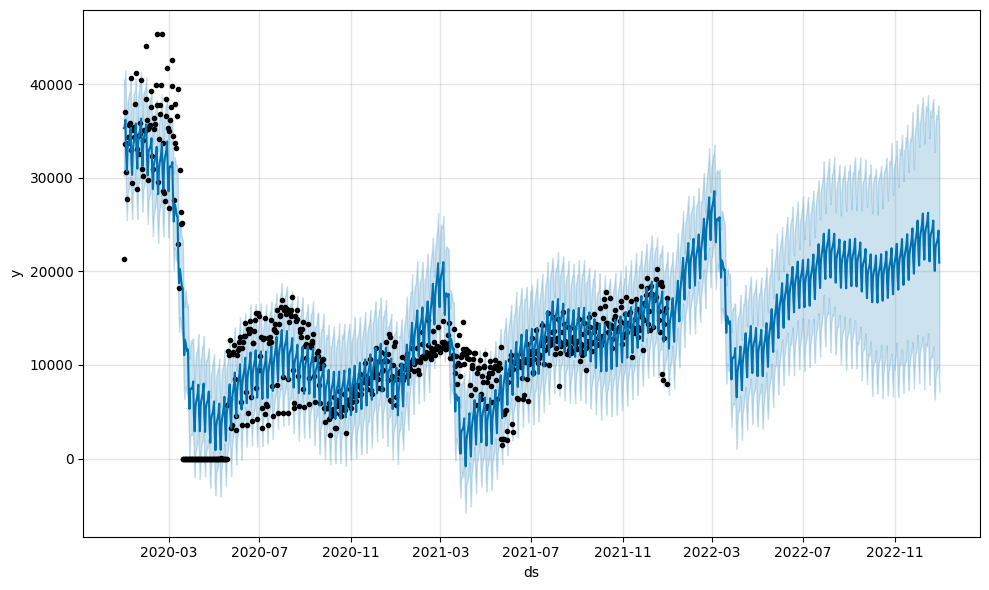

In [74]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

Se puede ver que hay una predisposición a que aumenten los pasos. Tiene sentido porque se estaría llegando a niveles que eran normales
antes de la pandemia. La pandemia causó que el tránsito disminuya pero es coherente que eventualmente vuelva a aumentar.

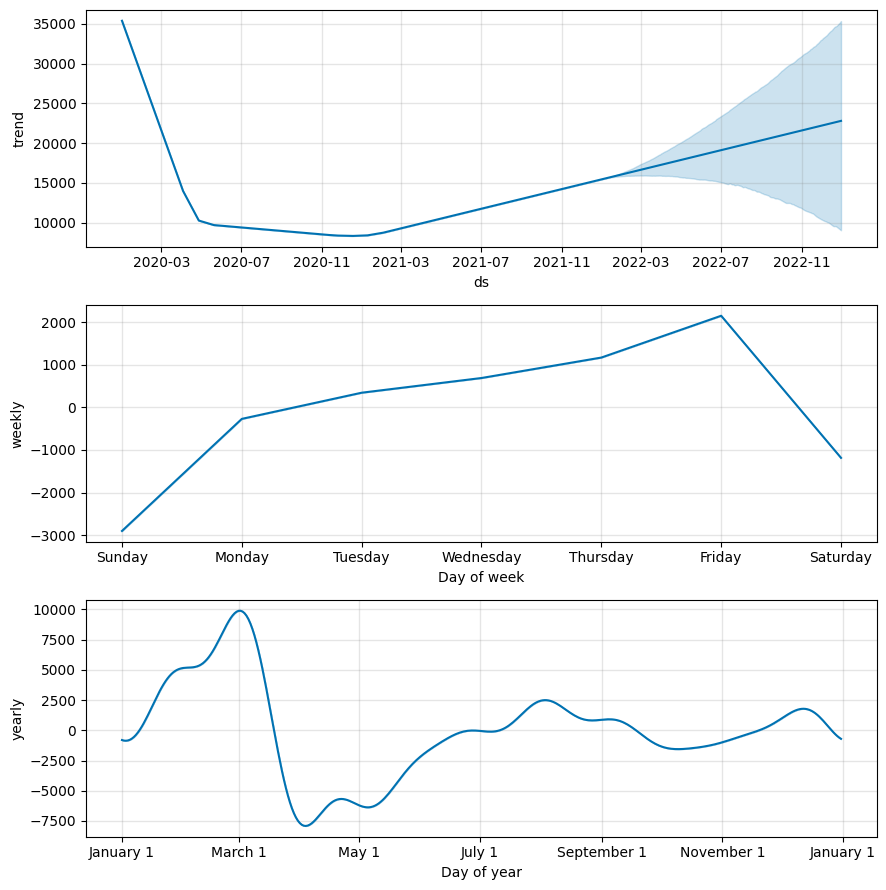

In [75]:
fig2 = m.plot_components(forecast)

También tiene sentido que haya un abanico que se agrande en el futuro porque cuanto más vamos hacia futuro,
el poder predictivo de un modelo debería ser menos preciso. 

A su vez, entiendo que es normal que la mayoría de la gente pase por los peajes los viernes porque es cuando comienza el fin
de semana.

Respecto a la última gráfica, no creo que sea muy útil en nuestro caso, por el hecho de que tuvimos una situación muy particular
con el COVID-19. El modelo está generando patrones anuales pero solo tiene datos de 2 años y los del 2020 no son ideales.